23/11/2020
Analysis of a dataset related to fuel consumption and CO2 emissions of cars in 2014.
With Python 3.8 (IDE : Jupyter Notebooks)
The goal is to analyse the relationships between the variables (especially the vehicle class) and the CO2 consumption.
I'll train ML models to try to predict CO2 emisions based on the other variables.

In [85]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [86]:
df = pd.read_csv(r"C:\Users\Fred\Dropbox\DATA SCIENCE\PORTFOLIO\CO2-emissions-cars-2014\FuelConsumptionCo2.csv")
backup = df

# PART 1 : BASIC EXPLORATION

In [87]:
df.shape

(1067, 13)

In [88]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33.0,196.0
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29.0,221.0
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48.0,136.0
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25.0,255.0
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27.0,244.0


### MISSING VALUES

In [89]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        1
FUELCONSUMPTION_COMB_MPG    1
CO2EMISSIONS                1
dtype: int64

In [90]:
df_nan = df[df.isna().any(axis=1)]
df_nan

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,NaN,NaN,NaN


#### The 3 NaN are on the same row. I drop it.

In [91]:
df = df.dropna(axis=0)

In [92]:
df.shape

(1066, 13)

### VARIABLES EXPLORATION

In [93]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1066.0,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,2014.0,3.346435,5.794559,13.295028,9.473921,11.579737,26.445591,256.193246
std,0.0,1.416553,1.798280,4.102884,2.795734,3.487031,7.470967,63.391475
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.225000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.575000,10.875000,13.375000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [94]:
df["MODELYEAR"].unique()

array([2014], dtype=int64)

#### "MODELYEAR" has only one value (2014). I drop it, there's no use for it.

In [95]:
df = df.drop(["MODELYEAR"], axis=1)

In [96]:
df.dtypes.value_counts()

float64    6
object     5
int64      1
dtype: int64

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

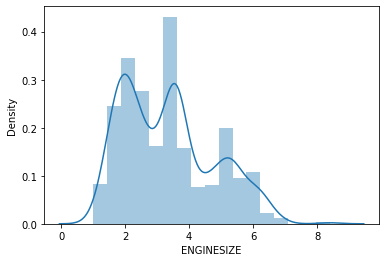

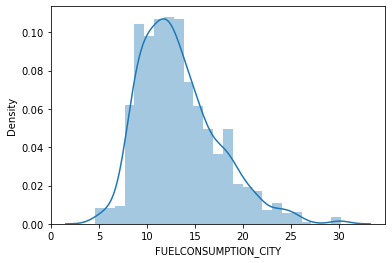

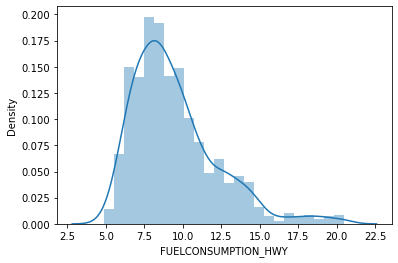

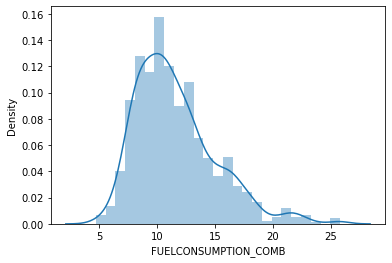

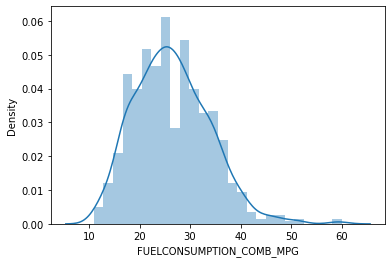

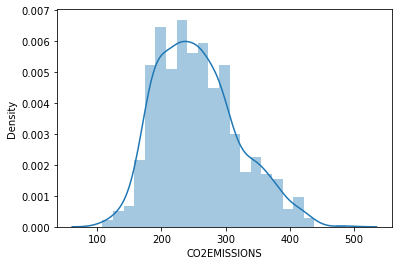

In [97]:
for column in df.select_dtypes('float64', 'int64').columns:
    plt.figure()
    sns.distplot(df[column])

#### We've got 4 different fuel consumption : city, highway, combined, and combined MPG (miles per gallon). I guess that the unit of the first 3 ones is liters per 100km, which is the standard except for the US where it is MPG. We don't need that many variables, I will keep only the combined in liters per 100km and drop the other 3.¶

In [14]:
df = df.drop(["FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB_MPG"], axis=1)

In [15]:
for col in df.select_dtypes('object').columns:
    print('The feature', col, 'has', len(df[col].value_counts()), 'categories')

The feature MAKE has 39 categories
The feature MODEL has 662 categories
The feature VEHICLECLASS has 16 categories
The feature TRANSMISSION has 22 categories
The feature FUELTYPE has 4 categories


#### There are many categories, especially for 'MODEL' and 'MAKE'. I drop 'MODEL', there are too many categories for it to be useful.

In [16]:
df = df.drop(["MODEL"], axis=1)

In [17]:
for column in df.select_dtypes('object').columns:
    print(df[column].value_counts())

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
AUDI             49
TOYOTA           49
GMC              49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
KIA              33
NISSAN           33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
LAND ROVER       19
CHRYSLER         19
BUICK            16
MITSUBISHI       16
RAM              13
ACURA            12
LINCOLN          11
FIAT             10
VOLVO            10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64
MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              109
FULL-SIZE                    86
TWO-SEATER                   71
SUB

#### Certain categories have very few occurrences, like SRT, SMART, LAMBORGHINI in "MAKE" and AS4, AS9, AM5 in "TRANSMISSION". Let's look at them more in details.

In [18]:
df.loc[df['MAKE'] == 'SRT']

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
940,SRT,TWO-SEATER,8.4,10,M6,Z,16.9,389.0
941,SRT,TWO-SEATER,8.4,10,M6,Z,16.9,389.0


In [19]:
df.loc[df['MAKE'] == 'SMART']

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
938,SMART,TWO-SEATER,1.0,3,AM5,Z,6.4,147.0
939,SMART,TWO-SEATER,1.0,3,AM5,Z,6.4,147.0


In [20]:
df.loc[df['MAKE'] == 'LAMBORGHINI']

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
633,LAMBORGHINI,TWO-SEATER,6.5,12,A7,Z,18.3,421.0
634,LAMBORGHINI,TWO-SEATER,5.2,10,A6,Z,15.7,361.0
635,LAMBORGHINI,TWO-SEATER,5.2,10,M6,Z,17.4,400.0


In [21]:
df.loc[df['TRANSMISSION'] == 'AS4']

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
934,SCION,STATION WAGON - SMALL,2.4,4,AS4,X,9.9,228.0


In [22]:
df.loc[df['TRANSMISSION'] == 'AS9']

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
638,LAND ROVER,SUV - SMALL,2.0,4,AS9,Z,9.8,225.0
639,LAND ROVER,SUV - SMALL,2.0,4,AS9,Z,9.8,225.0


In [23]:
df.loc[df['TRANSMISSION'] == 'AM5']

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
938,SMART,TWO-SEATER,1.0,3,AM5,Z,6.4,147.0
939,SMART,TWO-SEATER,1.0,3,AM5,Z,6.4,147.0


In [24]:
df.loc[df['TRANSMISSION'] == 'AV8']

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
19,AUDI,COMPACT,2.0,4,AV8,Z,8.8,202.0
660,LEXUS,MID-SIZE,3.5,6,AV8,Z,7.6,175.0
672,LEXUS,MID-SIZE,5.0,8,AV8,Z,11.4,262.0


In [25]:
df.loc[df['TRANSMISSION'] == 'AV7']

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
2,ACURA,COMPACT,1.5,4,AV7,Z,5.9,136.0
482,HONDA,MID-SIZE,2.4,4,AV7,X,8.1,186.0
489,HONDA,COMPACT,1.8,4,AV7,X,7.2,166.0
494,HONDA,TWO-SEATER,1.5,4,AV7,X,6.3,145.0
973,TOYOTA,MID-SIZE,1.8,4,AV7,X,7.3,168.0


#### I drop all the rows with a category that has less than 5 occurrences.

In [26]:
for column in df.select_dtypes('object').columns:
    print([df[column].value_counts().loc[lambda x : x<5]])

[LAMBORGHINI    3
SMART          2
SRT            2
Name: MAKE, dtype: int64]
[Series([], Name: VEHICLECLASS, dtype: int64)]
[AV8    3
AS9    2
AM5    2
AS4    1
Name: TRANSMISSION, dtype: int64]
[Series([], Name: FUELTYPE, dtype: int64)]


In [27]:
rows_to_drop = df.loc[(df['MAKE'] == 'SRT') | (df['MAKE'] == 'SMART') | (df['MAKE'] == 'LAMBORGHINI') | (df['TRANSMISSION'] == 'AS4') | (df['TRANSMISSION'] == 'AS9') | (df['TRANSMISSION'] == 'AM5') | (df['TRANSMISSION'] == 'AV8')]
rows_to_drop

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
19,AUDI,COMPACT,2.0,4,AV8,Z,8.8,202.0
633,LAMBORGHINI,TWO-SEATER,6.5,12,A7,Z,18.3,421.0
634,LAMBORGHINI,TWO-SEATER,5.2,10,A6,Z,15.7,361.0
635,LAMBORGHINI,TWO-SEATER,5.2,10,M6,Z,17.4,400.0
638,LAND ROVER,SUV - SMALL,2.0,4,AS9,Z,9.8,225.0
639,LAND ROVER,SUV - SMALL,2.0,4,AS9,Z,9.8,225.0
660,LEXUS,MID-SIZE,3.5,6,AV8,Z,7.6,175.0
672,LEXUS,MID-SIZE,5.0,8,AV8,Z,11.4,262.0
934,SCION,STATION WAGON - SMALL,2.4,4,AS4,X,9.9,228.0
938,SMART,TWO-SEATER,1.0,3,AM5,Z,6.4,147.0


In [28]:
a = list(rows_to_drop.index)
a

[19, 633, 634, 635, 638, 639, 660, 672, 934, 938, 939, 940, 941]

In [29]:
len(a)

13

In [30]:
df.shape

(1066, 8)

In [31]:
df = df.drop(a, axis=0)

In [32]:
df

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,ACURA,COMPACT,2.0,4,AS5,Z,8.5,196.0
1,ACURA,COMPACT,2.4,4,M6,Z,9.6,221.0
2,ACURA,COMPACT,1.5,4,AV7,Z,5.9,136.0
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,11.1,255.0
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,10.6,244.0
...,...,...,...,...,...,...,...,...
1061,VOLVO,SUV - SMALL,3.2,6,AS6,X,11.2,258.0
1062,VOLVO,SUV - SMALL,3.0,6,AS6,X,11.8,271.0
1063,VOLVO,SUV - SMALL,3.2,6,AS6,X,11.5,264.0
1064,VOLVO,SUV - SMALL,3.0,6,AS6,X,11.8,271.0


### ENCODING

In [33]:
encoding = make_column_transformer(
                                   (OneHotEncoder(),
                                   ['MAKE', 'VEHICLECLASS', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE']),
                                   remainder='passthrough')

### TARGET

In [34]:
print(sorted(df['CO2EMISSIONS'].unique()))

[108.0, 110.0, 124.0, 126.0, 129.0, 131.0, 136.0, 138.0, 143.0, 145.0, 147.0, 152.0, 156.0, 159.0, 161.0, 162.0, 163.0, 165.0, 166.0, 168.0, 170.0, 172.0, 173.0, 175.0, 177.0, 179.0, 181.0, 182.0, 184.0, 186.0, 189.0, 191.0, 192.0, 193.0, 194.0, 195.0, 196.0, 197.0, 198.0, 200.0, 202.0, 205.0, 207.0, 209.0, 212.0, 213.0, 214.0, 216.0, 218.0, 221.0, 222.0, 223.0, 224.0, 225.0, 227.0, 228.0, 229.0, 230.0, 232.0, 235.0, 237.0, 239.0, 242.0, 244.0, 246.0, 248.0, 250.0, 251.0, 253.0, 254.0, 255.0, 256.0, 258.0, 259.0, 260.0, 262.0, 264.0, 265.0, 267.0, 269.0, 270.0, 271.0, 272.0, 274.0, 275.0, 276.0, 277.0, 278.0, 280.0, 281.0, 283.0, 285.0, 286.0, 288.0, 290.0, 292.0, 294.0, 297.0, 299.0, 301.0, 304.0, 306.0, 308.0, 310.0, 313.0, 315.0, 317.0, 318.0, 320.0, 322.0, 324.0, 327.0, 329.0, 331.0, 334.0, 336.0, 338.0, 340.0, 342.0, 343.0, 344.0, 345.0, 346.0, 347.0, 350.0, 352.0, 354.0, 356.0, 359.0, 360.0, 361.0, 362.0, 363.0, 366.0, 368.0, 370.0, 373.0, 377.0, 380.0, 382.0, 384.0, 386.0, 393.0

#### The target is a discrete variable --> regression algorithms.

### RELATIONSHIP BETWEEN VARIABLES

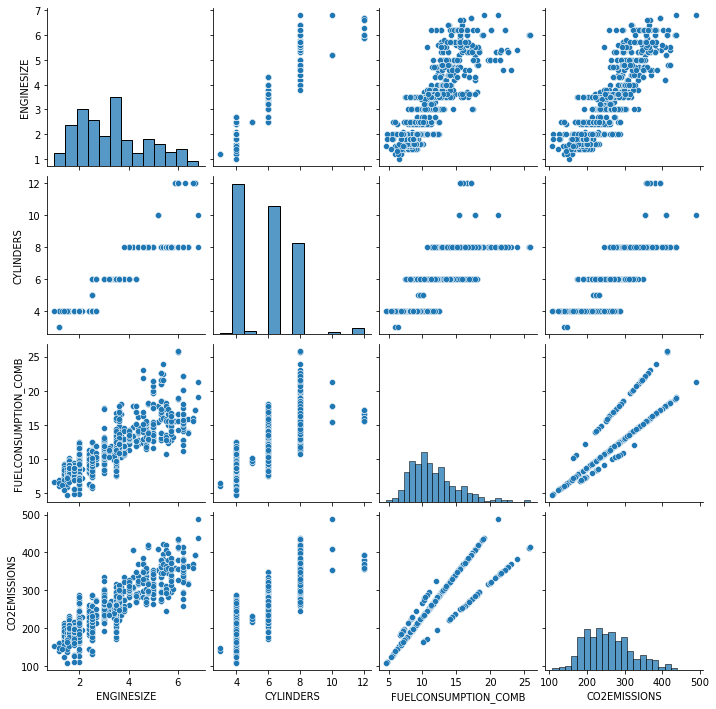

In [35]:
sns.pairplot(df)

<AxesSubplot:>

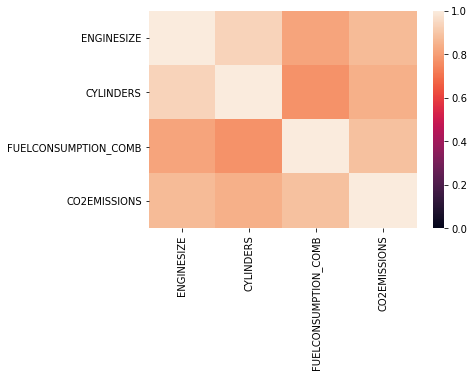

In [36]:
sns.heatmap(df.corr(), vmin=0, vmax=1)

In [37]:
df.corr(method ='pearson')

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934509,0.819954,0.874137
CYLINDERS,0.934509,1.000000,0.774539,0.846835
FUELCONSUMPTION_COMB,0.819954,0.774539,1.000000,0.890334
CO2EMISSIONS,0.874137,0.846835,0.890334,1.000000


####  Comments on correlations
ENGINESIZE with CYLINDERS (0.934) is irrelevant because it's normal that there are more cylinders when the engine is bigger.
FUELCONSUMPTION_COMB with CO2EMISSIONS are logicallay strongly correlated (0.892). I will not use FUELCONSUMPTION_COMB as a variable in the model, I want to be able to predict the CO2 emissions based on the other variables, without knowing the fuel consumption. Though it looks like we have 3 clusters, probably due to the FUELTYPE.

In [38]:
df = df.drop(["FUELCONSUMPTION_COMB"], axis=1)

### OUTLIERS

In [39]:
# x = encoding.fit_transform(df.drop(["CO2EMISSIONS"], axis=1))

In [40]:
# y = df['CO2EMISSIONS']

In [41]:
# sns.boxplot(x=x, y=y)

# PART 2 - MODELING

In [42]:
df

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,CO2EMISSIONS
0,ACURA,COMPACT,2.0,4,AS5,Z,196.0
1,ACURA,COMPACT,2.4,4,M6,Z,221.0
2,ACURA,COMPACT,1.5,4,AV7,Z,136.0
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,255.0
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,244.0
...,...,...,...,...,...,...,...
1061,VOLVO,SUV - SMALL,3.2,6,AS6,X,258.0
1062,VOLVO,SUV - SMALL,3.0,6,AS6,X,271.0
1063,VOLVO,SUV - SMALL,3.2,6,AS6,X,264.0
1064,VOLVO,SUV - SMALL,3.0,6,AS6,X,271.0


### MODELS

In [43]:
LR = LinearRegression()
Poly_2_Reg = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
Poly_3_Reg = make_pipeline(PolynomialFeatures(3, include_bias=False), LinearRegression())
LogReg = LogisticRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
SVM = make_pipeline(StandardScaler(with_mean=False), SVR())
KNN = make_pipeline(StandardScaler(with_mean=False), KNeighborsRegressor())
SGDR = SGDRegressor()
GBR = GradientBoostingRegressor()
ADA = AdaBoostRegressor()

In [44]:
dict_of_models = {'Linear_Regression': LR,
                  'Polynomial_2_Regression': Poly_2_Reg,
                  'Polynomial_3_Regression': Poly_3_Reg,
                  #'Logistic_Regression': LogReg,
                  'DecisionTreeRegressor': DT,
                  'RandomForestRegressor': RF,
                  'SVM': SVM,
                  'KNN': KNN,
                  'SGDR': SGDR,
                  'GBR': GBR,
                  'ADA': ADA,
                  }

### CUSTOM SCORING

In [45]:
def under_10_percent_error(y_test, y_pred):
    error = 100*(sum(abs(y_pred-y_test)/y_test < 0.1) / len(y_test))
    return round(error, 2)

In [46]:
def max_error(y_test, y_pred):
    error = 100*max(abs(y_pred-y_test)/y_test)
    return round(error, 2)

In [47]:
comparison_matrix = pd.DataFrame(index = dict_of_models.keys(), columns = ['Train_score',
                                                                           'Cross_val_score',
                                                                           'Test_score',
                                                                           'r2',
                                                                           'MAE (absolute values)',
                                                                           'MAE (%)',
                                                                           'Accuracy (%)',
                                                                           'Predictions under 10% error (%)',
                                                                           'Maximum error (%)'])

comparison_matrix

,Train_score,Cross_val_score,Test_score,r2,MAE (absolute values),MAE (%),Accuracy (%),Predictions under 10% error (%),Maximum error (%)
Linear_Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial_2_Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial_3_Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DecisionTreeRegressor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RandomForestRegressor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SGDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### TRAIN TEST SPLIT

In [48]:
trainset, testset = train_test_split(df, test_size=0.5, random_state=0)

In [49]:
print("trainset length: ", len(trainset['CO2EMISSIONS']), " // testset length: ", len(testset['CO2EMISSIONS']))

trainset length:  526  // testset length:  527


In [50]:
def variable_selection(df):
    X = df.drop(["CO2EMISSIONS"], axis=1)
    y = df['CO2EMISSIONS']
    return X, y

In [51]:
X_train, y_train = variable_selection(trainset)
X_test, y_test = variable_selection(testset)
y_pred = []

In [52]:
df_categories = []
for col in df.select_dtypes('object').columns:
    print('The feature', col, 'has', len(df[col].value_counts()), 'categories')
    df_categories.append(len(df[col].value_counts()))
print(df_categories)

The feature MAKE has 36 categories
The feature VEHICLECLASS has 16 categories
The feature TRANSMISSION has 18 categories
The feature FUELTYPE has 4 categories
[36, 16, 18, 4]


In [53]:
X_train_categories = []
for col in X_train.select_dtypes('object').columns:
    print('The feature', col, 'has', len(X_train[col].value_counts()), 'categories')
    X_train_categories.append(len(X_train[col].value_counts()))
print(X_train_categories)

The feature MAKE has 36 categories
The feature VEHICLECLASS has 16 categories
The feature TRANSMISSION has 18 categories
The feature FUELTYPE has 4 categories
[36, 16, 18, 4]


In [54]:
X_test_categories = []
for col in X_test.select_dtypes('object').columns:
    print('The feature', col, 'has', len(X_test[col].value_counts()), 'categories')
    X_test_categories.append(len(X_test[col].value_counts()))
print(X_test_categories)

The feature MAKE has 36 categories
The feature VEHICLECLASS has 16 categories
The feature TRANSMISSION has 18 categories
The feature FUELTYPE has 4 categories
[36, 16, 18, 4]


In [55]:
assert df_categories == X_train_categories == X_test_categories

# IMPORTANT NOTE
#### If this step fails, it means the number of categories is not the same across df, X_train and X_test, for at least one variable. This is due to the low occurrences in certain categories. I decided to leave the categories with more than 5 occurrences. To solve this issue, we can either raise this thershold of 5 categories, or run again the train test split and see if a new split solves the issue.

In [56]:
X_train_coded = encoding.fit_transform(X_train)
X_test_coded = encoding.fit_transform(X_test)

### EVALUATION PROCESS

In [57]:
def model_fit_predict():
    global y_pred
    y_pred = []
    model.fit(X_train_coded, y_train)
    y_pred = model.predict(X_test_coded)

In [58]:
def scoring():
    global scoring_values
    scoring_values = []
    train_score = round(model.score(X_train_coded, y_train), 3)
    val_score = round(cross_val_score(model, X_train_coded, y_train, scoring='r2', cv=5).mean(), 3)
    test_score = round(model.score(X_test_coded, y_test), 3)
    r2 = round(r2_score(y_test, y_pred), 3)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mape = round(100 * mae/np.mean(y_test), 2)
    accuracy = 100-mape
    predictions_under_10_percent_error = under_10_percent_error(y_test, y_pred)
    maximum_error = max_error(y_test, y_pred)
    
    scoring_values = [train_score,
                      val_score,
                      test_score,
                      r2,
                      mae,
                      mape,
                      accuracy,
                      predictions_under_10_percent_error,
                      maximum_error]

In [59]:
def scatter():
    # I display the predictions with 1 dimension only, but it was trained with more dimensions/features.    
    plt.figure(figsize=(12,8))
    plt.title(model)
    plt.scatter(testset['ENGINESIZE'],  y_test, label='y_test', c='dodgerblue')
    plt.scatter(testset['ENGINESIZE'], y_pred, label='y_pred', c='darkorange')
    plt.legend()
    plt.show()

In [60]:
def errors_histogram():
    plt.figure(figsize=(12,8))
    plt.title(model)
    error_hist = np.abs(100*(y_test - y_pred)/y_test)
    plt.hist(error_hist, bins=50)
    plt.xlabel('% error')
    plt.ylabel('occurrences')
    plt.show()

In [61]:
def evaluation(model):
    model_fit_predict()
    scoring()
    scatter()
    errors_histogram()

### MODEL COMPARISON AND SELECTION

In [62]:
scoring_values = []

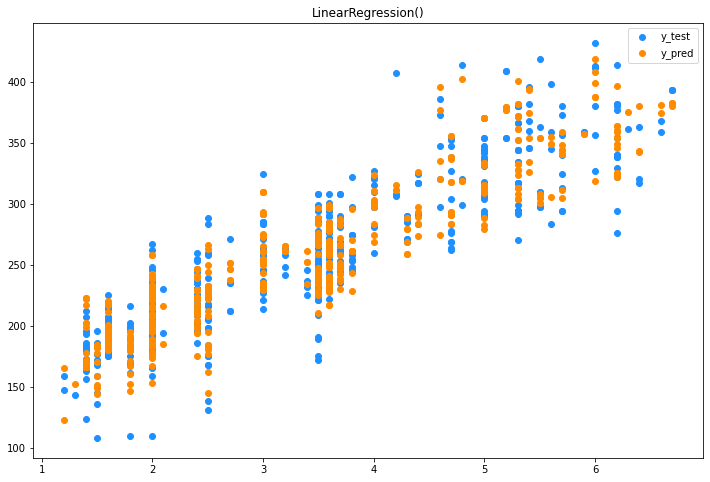

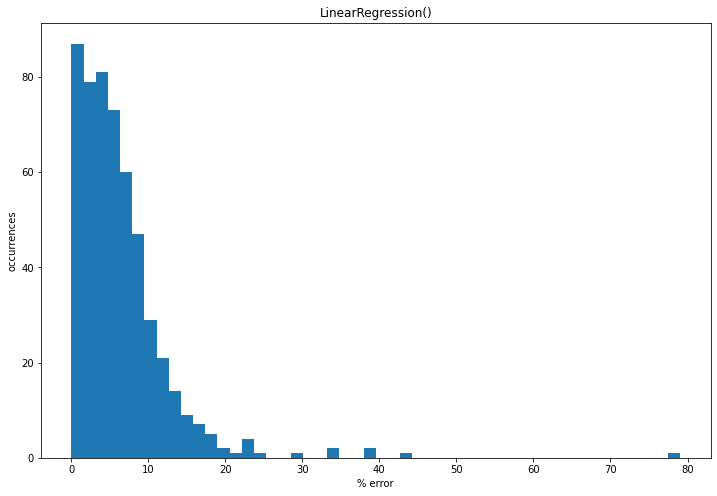

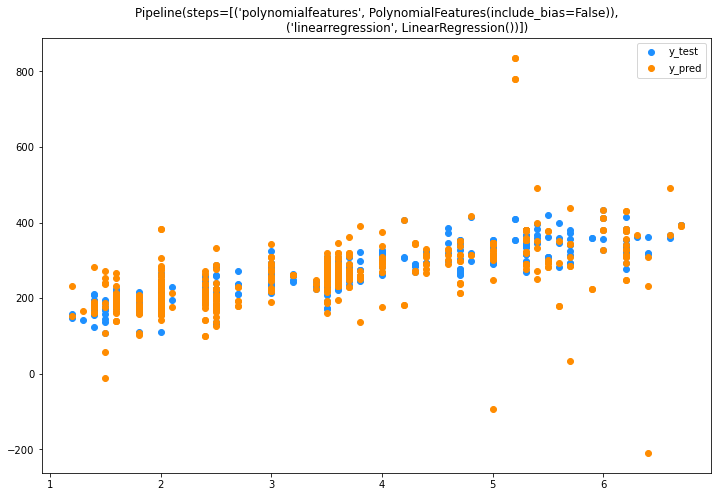

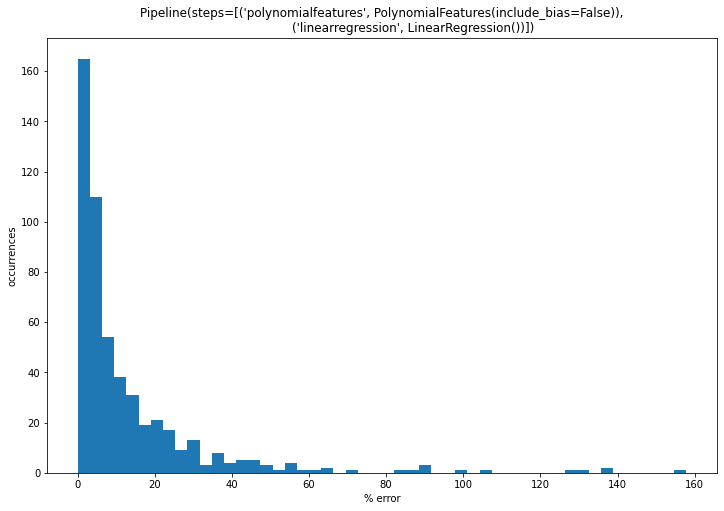

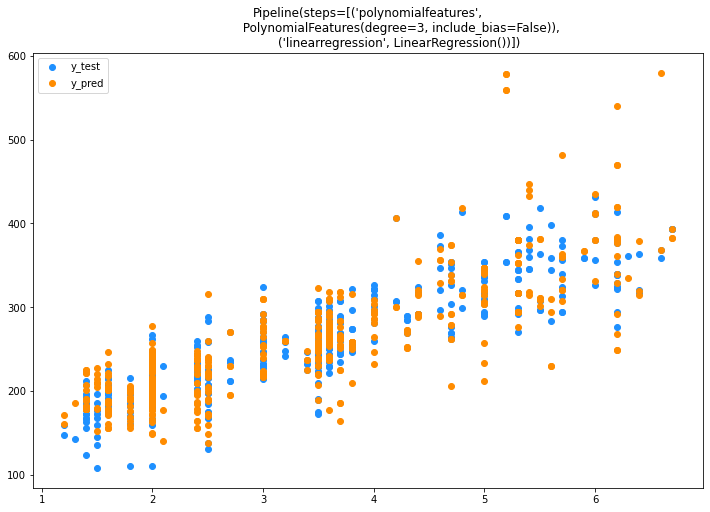

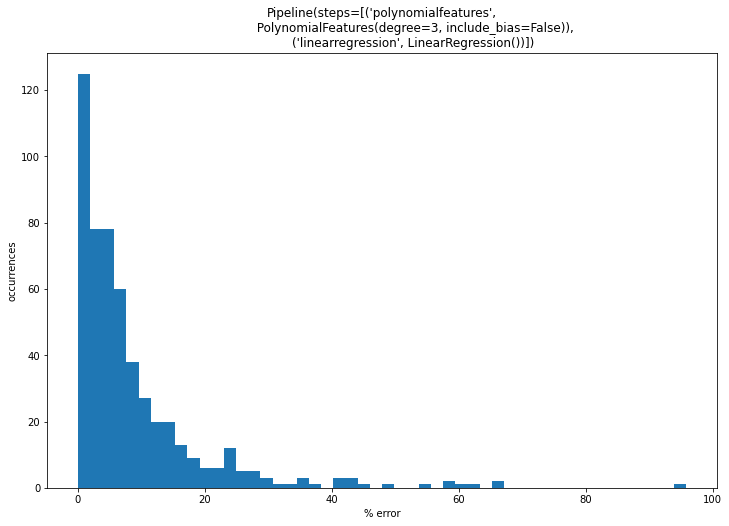

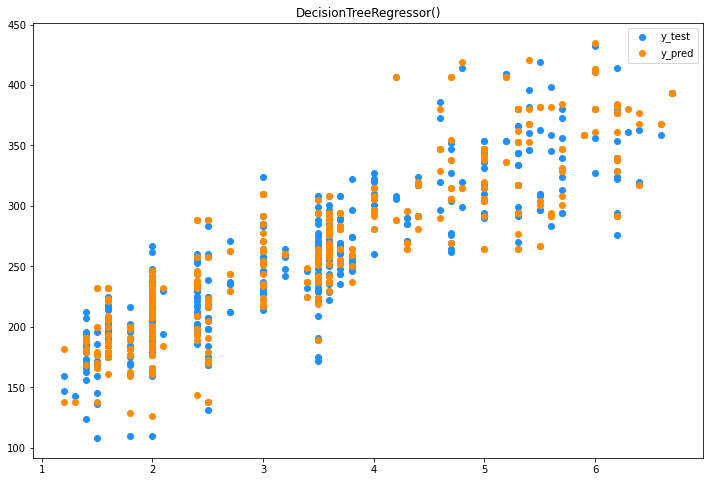

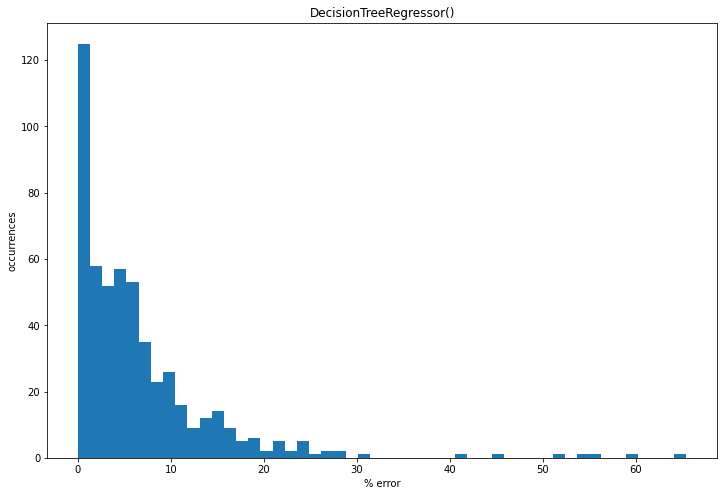

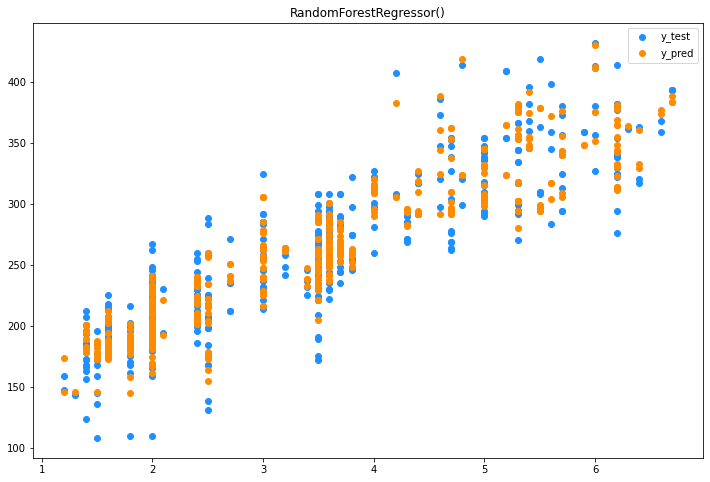

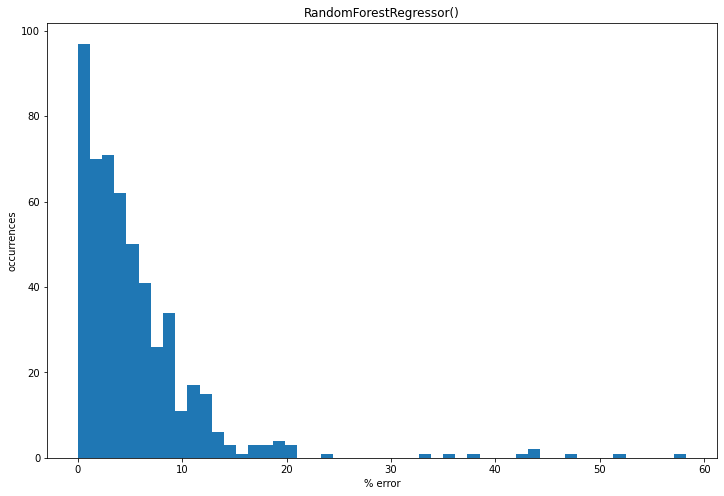

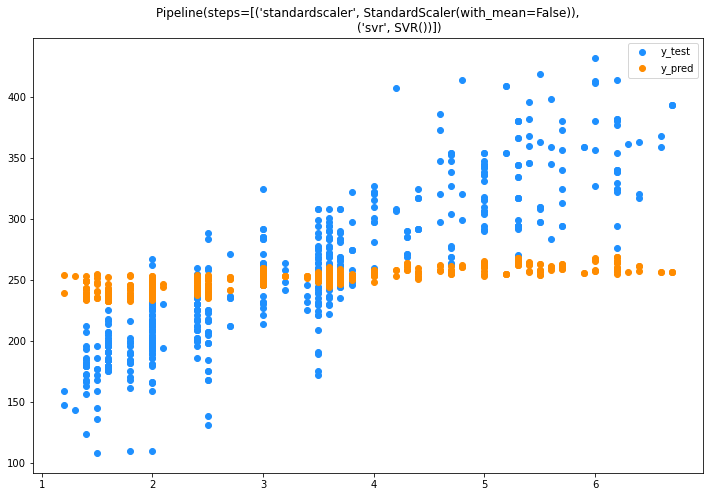

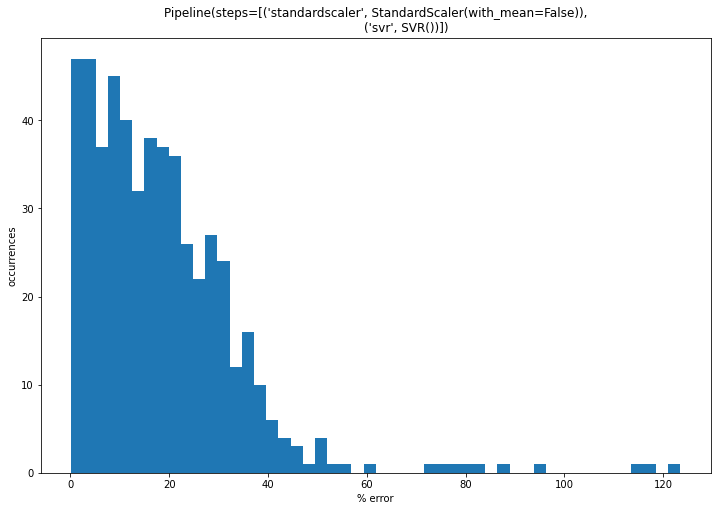

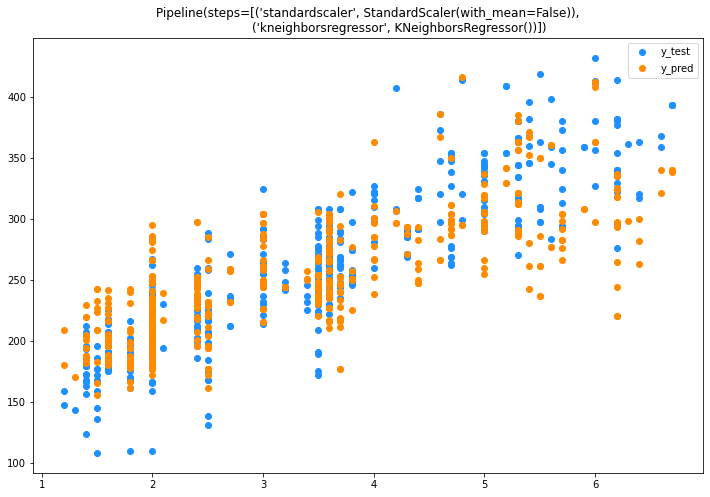

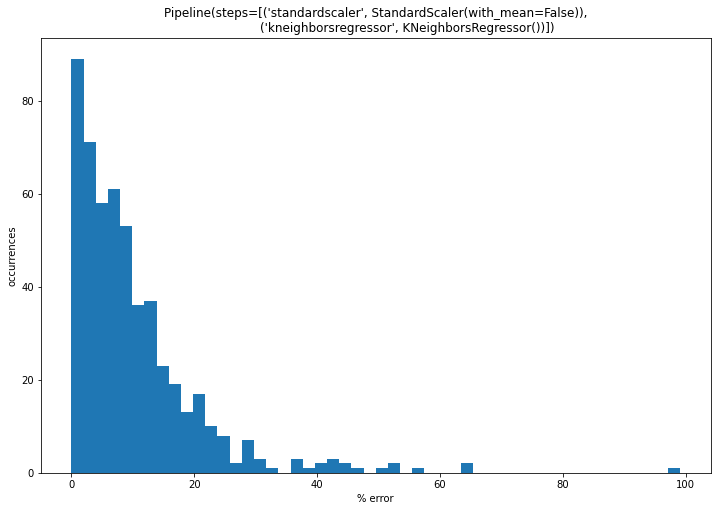

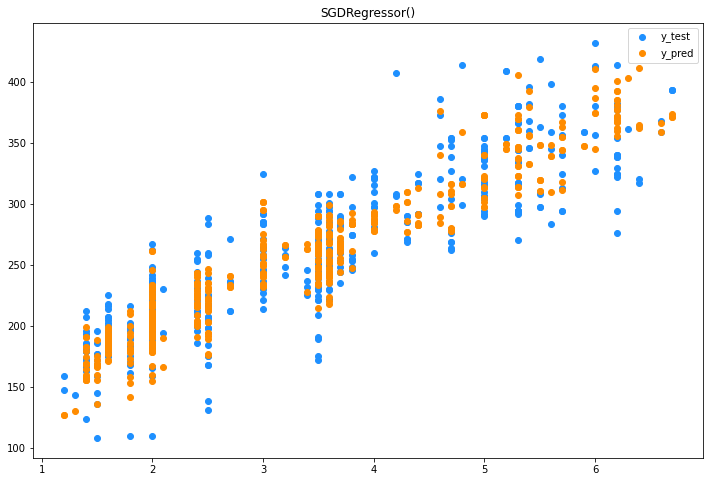

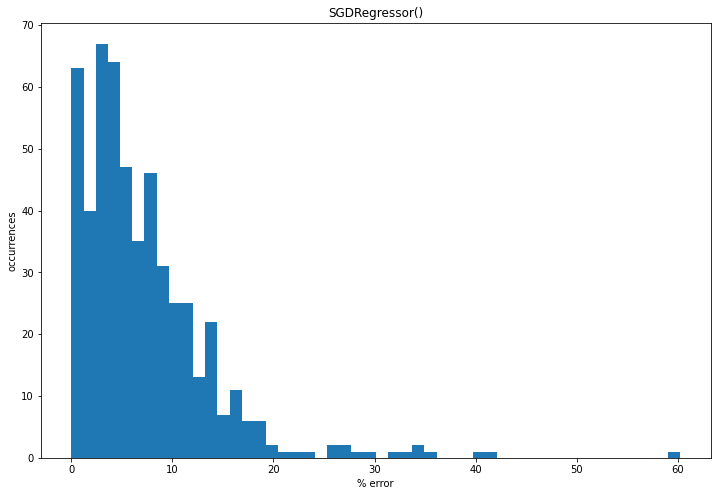

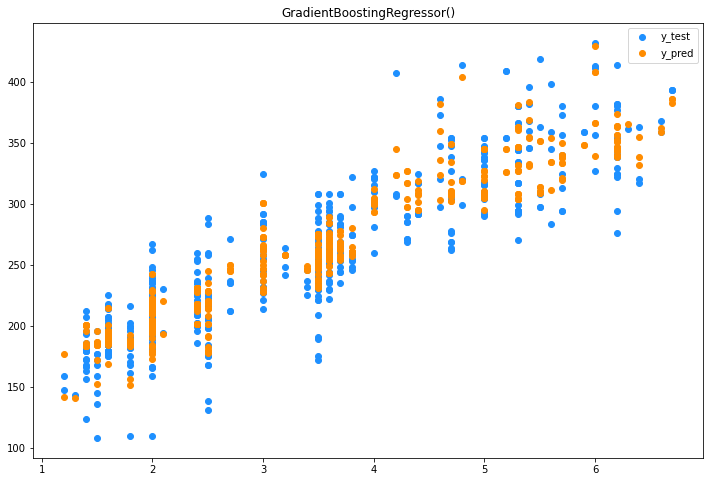

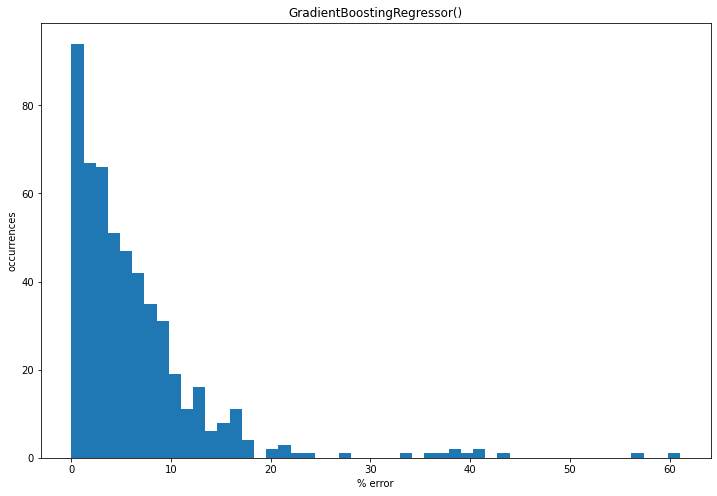

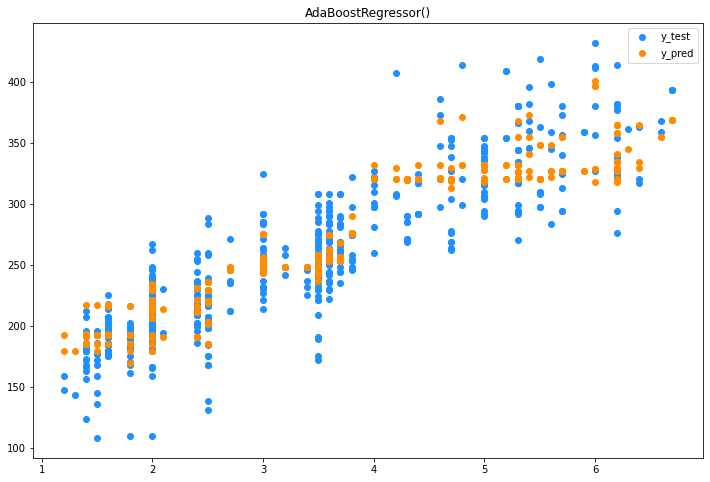

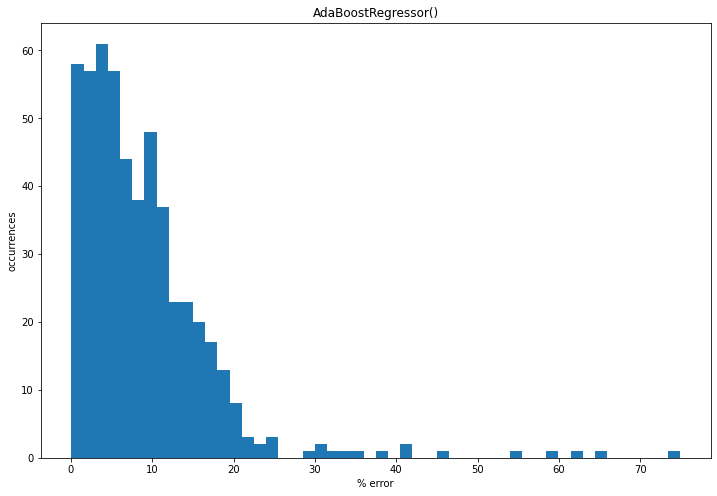

In [63]:
for name, model in dict_of_models.items():
    evaluation(model)
    comparison_matrix.loc[name]= scoring_values

In [64]:
comparison_matrix

,Train_score,Cross_val_score,Test_score,r2,MAE (absolute values),MAE (%),Accuracy (%),Predictions under 10% error (%),Maximum error (%)
Linear_Regression,0.918,0.867,0.897,0.897,15.48,6.04,93.96,83.49,79.04
Polynomial_2_Regression,0.991,-6.156,-0.088,-0.088,32.93,12.86,87.14,64.9,157.87
Polynomial_3_Regression,0.992,0.69,0.662,0.662,21.62,8.44,91.56,74.38,95.85
DecisionTreeRegressor,0.992,0.851,0.868,0.868,15.66,6.11,93.89,79.7,65.45
RandomForestRegressor,0.983,0.899,0.914,0.914,13.25,5.17,94.83,86.91,58.3
SVM,0.212,0.158,0.191,0.191,45.38,17.72,82.28,33.4,123.45
KNN,0.814,0.666,0.712,0.712,24.87,9.71,90.29,63.0,99.09
SGDR,0.872,0.82,0.859,0.859,18.01,7.03,92.97,76.66,60.21
GBR,0.936,0.885,0.892,0.892,15.17,5.92,94.08,82.92,61.06
ADA,0.836,0.793,0.818,0.818,21.26,8.3,91.7,65.46,74.92


# PART 3 : OPTIMISATION OF GBR

In [65]:
GBR_base_model_1 = GradientBoostingRegressor(random_state=6)
GBR_base_model_2 = GradientBoostingRegressor(random_state=7)
GBR_base_model_3 = GradientBoostingRegressor(random_state=8)

In [66]:
GBR_metrics_matrix = pd.DataFrame(index = ['GBR_base_model_1',
                                           'GBR_base_model_2',
                                           'GBR_base_model_3',
                                           'GBR_random_best_model',
                                           'GBR_grid_best_model'],
                                  columns = ['Train_score',
                                             'Val_score',
                                             'Test_score',
                                             'r2',
                                             'MAE (absolute values)',
                                             'MAE (%)',
                                             'Accuracy (%)',
                                             'Predictions under 10% error (%)',
                                             'Maximum error (%)'])

In [67]:
GBR_metrics_matrix

,Train_score,Val_score,Test_score,r2,MAE (absolute values),MAE (%),Accuracy (%),Predictions under 10% error (%),Maximum error (%)
GBR_base_model_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBR_base_model_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBR_base_model_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBR_random_best_model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBR_grid_best_model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### TRAIN TEST SPLIT

In [68]:
trainset, testset = train_test_split(df, test_size=0.5, random_state=0)

In [69]:
X_train, y_train = variable_selection(trainset)
X_test, y_test = variable_selection(testset)
y_pred = []

In [70]:
df_categories = []
for col in df.select_dtypes('object').columns:
    print('The feature', col, 'has', len(df[col].value_counts()), 'categories')
    df_categories.append(len(df[col].value_counts()))
print(df_categories)

X_train_categories = []
for col in X_train.select_dtypes('object').columns:
    print('The feature', col, 'has', len(X_train[col].value_counts()), 'categories')
    X_train_categories.append(len(X_train[col].value_counts()))
print(X_train_categories)

X_test_categories = []
for col in X_test.select_dtypes('object').columns:
    print('The feature', col, 'has', len(X_test[col].value_counts()), 'categories')
    X_test_categories.append(len(X_test[col].value_counts()))
print(X_test_categories)

assert df_categories == X_train_categories == X_test_categories

The feature MAKE has 36 categories
The feature VEHICLECLASS has 16 categories
The feature TRANSMISSION has 18 categories
The feature FUELTYPE has 4 categories
[36, 16, 18, 4]
The feature MAKE has 36 categories
The feature VEHICLECLASS has 16 categories
The feature TRANSMISSION has 18 categories
The feature FUELTYPE has 4 categories
[36, 16, 18, 4]
The feature MAKE has 36 categories
The feature VEHICLECLASS has 16 categories
The feature TRANSMISSION has 18 categories
The feature FUELTYPE has 4 categories
[36, 16, 18, 4]


In [71]:
X_train_coded = encoding.fit_transform(X_train)
X_test_coded = encoding.fit_transform(X_test)

### EVALUATION FUNCTION

In [72]:
def search_cv_evaluation(model):
    model_fit_predict()
    scoring()

### RANDOMIZED SEARCH CV

GBR_random_params = {'n_estimators': [10, 50, 100, 200, 500],
                     'max_depth': [2, 3, 5, 10, 15, 20, 50, None],
                     'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                     'loss': ['ls', 'lad', 'huber'],
                     'subsample':[0.2, 0.5, 0.8, 1.0],
                     'n_iter_no_change':[5, 10, 20, None],
                     'max_leaf_nodes':[3,5,10,20,None]
                     }

In [73]:
GBR_random_params = {'n_estimators': [10, 25, 50, 75, 100, 200],
                     'max_depth': [10, 15, 20, 30, 40, 50, None],
                     'learning_rate': [0.1, 0,15, 0.2, 0,25, 0.3],
                     'loss': ['ls', 'lad', 'huber'],
                     'subsample':[0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 1.0],
                     'n_iter_no_change':[2, 3, 4, 5, 7, 10, 20, None],
                     'max_leaf_nodes':[5,10,20,30, 40 ,50, None]
                     }

In [74]:
random = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=GBR_random_params, cv=4, n_iter=100)

In [75]:
random.fit(X_train_coded, y_train)

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 231, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548:

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 231, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548:

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 231, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548:

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\Fred\anaconda3\envs\t

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\Fred\anaconda3\envs

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tenso

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\Fred\anaconda3\envs

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 231, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548:

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 231, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548:

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 231, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548:

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:384: RuntimeWarning: overflow encountered in square
  diff[gamma_mask] ** 2)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:384: RuntimeWarning: overflow encountered in square
  diff[gamma_mask] ** 2)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:384: RuntimeWarning: overflow encountered in square
  diff[gamma_mask] ** 2)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:384: RuntimeWarning: overflow encountered in square
  diff[gamma_mask] ** 2)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.p

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:384: RuntimeWarning: overflow encountered in square
  diff[gamma_mask] ** 2)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:384: RuntimeWarning: overflow encountered in square
  diff[gamma_mask] ** 2)
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorf

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:565: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
C:\Users\Fred\anaconda3\

C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_gb.py", line 231, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Fred\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548:

RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0, 15, 0.2, 0,
                                                          25, 0.3],
                                        'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [10, 15, 20, 30, 40, 50,
                                                      None],
                                        'max_leaf_nodes': [5, 10, 20, 30, 40,
                                                           50, None],
                                        'n_estimators': [10, 25, 50, 75, 100,
                                                         200],
                                        'n_iter_no_change': [2, 3, 4, 5, 7, 10,
                                                             20, None],
                                        'subsample': [0.2, 0.3, 0.5, 0.7, 0.8,
                                               

In [76]:
GBR_random_best_params = random.best_params_

In [77]:
GBR_random_best_model = random.best_estimator_

In [78]:
print('Random best parameters :', GBR_random_best_params)

Random best parameters : {'subsample': 0.9, 'n_iter_no_change': 4, 'n_estimators': 25, 'max_leaf_nodes': 40, 'max_depth': 20, 'loss': 'ls', 'learning_rate': 0.2}


### GRID SEARCH CV

In [79]:
GBR_grid_params = {'n_estimators': [40, 50, 60],
                     'max_depth': [30],
                     'learning_rate': [0.2],
                     'loss': ['huber', 'ls'],
                     'subsample':[0.8, 1],
                     'n_iter_no_change':[None],
                     'max_leaf_nodes':[20]
                     }

In [80]:
grid = GridSearchCV(GradientBoostingRegressor(), param_grid=GBR_grid_params, cv=4)
grid.fit(X_train_coded, y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2], 'loss': ['huber', 'ls'],
                         'max_depth': [30], 'max_leaf_nodes': [20],
                         'n_estimators': [40, 50, 60],
                         'n_iter_no_change': [None], 'subsample': [0.8, 1]})

In [81]:
GBR_grid_best_params = grid.best_params_
GBR_grid_best_model = grid.best_estimator_
print('Grid best parameters :', GBR_grid_best_params)

Grid best parameters : {'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 30, 'max_leaf_nodes': 20, 'n_estimators': 60, 'n_iter_no_change': None, 'subsample': 0.8}


### BASE MODEL  vs  RANDOMIZED  SEARCH CV  vs  GRID SEARCH CV

In [82]:
dict_of_models_GBR = {'GBR_base_model_1': GBR_base_model_1,
                    'GBR_base_model_2': GBR_base_model_2,
                    'GBR_base_model_3': GBR_base_model_3,
                    'GBR_random_best_model': GBR_random_best_model,
                    'GBR_grid_best_model': GBR_grid_best_model,
                    }

In [83]:
for name, model in dict_of_models_GBR.items():
    search_cv_evaluation(model)
    GBR_metrics_matrix.loc[name]= scoring_values

GBR_metrics_matrix

,Train_score,Val_score,Test_score,r2,MAE (absolute values),MAE (%),Accuracy (%),Predictions under 10% error (%),Maximum error (%)
GBR_base_model_1,0.936,0.885,0.892,0.892,15.18,5.93,94.07,82.92,61.06
GBR_base_model_2,0.936,0.885,0.892,0.892,15.18,5.93,94.07,83.11,61.3
GBR_base_model_3,0.936,0.886,0.893,0.893,15.13,5.91,94.09,83.11,61.06
GBR_random_best_model,0.977,0.901,0.915,0.915,13.36,5.22,94.78,85.77,55.48
GBR_grid_best_model,0.984,0.909,0.923,0.923,12.34,4.82,95.18,86.53,63.13
